In [1]:
from astropy.io import fits
from astropy.table import Table, join, vstack, Column
from astropy.table import QTable
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
from astropy import units as u 
import math as m
import csv
import pandas as pd
from collections import Counter
from scipy.stats import ks_2samp, norm
from scipy import stats
import seaborn as sns
from astropy.utils.data import get_pkg_data_filename
from matplotlib.colors import LogNorm
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from matplotlib.patches import Rectangle
np.set_printoptions(threshold=100000)
import matplotlib.mlab as mlab
#import statmorph
#from statmorph.utils.image_diagnostics import make_figure
import random
from astropy.visualization import simple_norm
import scipy.constants as constants

In [2]:
by_hand = pd.read_csv('xlssc122_F105_F140_redshifts_short_v4_snr_em_member2_by_hand.csv') 
by_hand = by_hand.rename(columns={"phot-id": "phot_id"})
by_hand_T = Table.from_pandas(by_hand)



In [3]:
tab = fits.open('OGMembers_data.fits')
OGMembers_data = Table(tab[1].data)



In [4]:
A_photID145 = pd.read_csv('fit_photometry_only_ID_145.txt', delimiter=' ')  
A_photID229 = pd.read_csv('fit_photometry_only_ID_229.txt', delimiter=' ')  
A_photID236 = pd.read_csv('fit_photometry_only_ID_236.txt', delimiter=' ')  
A_photID240 = pd.read_csv('fit_photometry_only_ID_240.txt', delimiter=' ')  
A_photID263 = pd.read_csv('fit_photometry_only_ID_263.txt', delimiter=' ')  

A_photID295 = pd.read_csv('fit_photometry_only_ID_295.txt', delimiter=' ')  

A_photID298 = pd.read_csv('fit_photometry_only_ID_298.txt', delimiter=' ')  

A_photID329 = pd.read_csv('fit_photometry_only_ID_329.txt', delimiter=' ')  

A_photID345 = pd.read_csv('fit_photometry_only_ID_345.txt', delimiter=' ')  

A_photID372 = pd.read_csv('fit_photometry_only_ID_372.txt', delimiter=' ')  

A_photID402 = pd.read_csv('fit_photometry_only_ID_402.txt', delimiter=' ')  

A_photID428 = pd.read_csv('fit_photometry_only_ID_428.txt', delimiter=' ')  

A_photID451 = pd.read_csv('fit_photometry_only_ID_451.txt', delimiter=' ')  

A_photID452 = pd.read_csv('fit_photometry_only_ID_452.txt', delimiter=' ')  

A_photID466 = pd.read_csv('fit_photometry_only_ID_466.txt', delimiter=' ')  

A_photID493 = pd.read_csv('fit_photometry_only_ID_493.txt', delimiter=' ')  
A_photID522 = pd.read_csv('fit_photometry_only_ID_522.txt', delimiter=' ')  

A_photID526 = pd.read_csv('fit_photometry_only_ID_526.txt', delimiter=' ')  

A_photID547 = pd.read_csv('fit_photometry_only_ID_547.txt', delimiter=' ')  

A_photID603 = pd.read_csv('fit_photometry_only_ID_603.txt', delimiter=' ')  

A_photID606 = pd.read_csv('fit_photometry_only_ID_606.txt', delimiter=' ')  

A_photID642 = pd.read_csv('fit_photometry_only_ID_642.txt', delimiter=' ')  

A_photID649 = pd.read_csv('fit_photometry_only_ID_649.txt', delimiter=' ')  

A_photID657 = pd.read_csv('fit_photometry_only_ID_657.txt', delimiter=' ')  

A_photID726 = pd.read_csv('fit_photometry_only_ID_726.txt', delimiter=' ')  
A_photID730 = pd.read_csv('fit_photometry_only_ID_730.txt', delimiter=' ')  

A_photID734 = pd.read_csv('fit_photometry_only_ID_734.txt', delimiter=' ')  

A_photID806 = pd.read_csv('fit_photometry_only_ID_806.txt', delimiter=' ')  

A_photID845 = pd.read_csv('fit_photometry_only_ID_845.txt', delimiter=' ')  

A_photID917 = pd.read_csv('fit_photometry_only_ID_917.txt', delimiter=' ')  

A_photID1032 = pd.read_csv('fit_photometry_only_ID_1032.txt', delimiter=' ')  

A_photID1050 = pd.read_csv('fit_photometry_only_ID_1050.txt', delimiter=' ')  

A_photID1065 = pd.read_csv('fit_photometry_only_ID_1064.txt', delimiter=' ')  

A_photID1125 = pd.read_csv('fit_photometry_only_ID_1125.txt', delimiter=' ')  

A_photID1141 = pd.read_csv('fit_photometry_only_ID_1141.txt', delimiter=' ')  

A_photID1220 = pd.read_csv('fit_photometry_only_ID_1220.txt', delimiter=' ')  

A_photID1253 = pd.read_csv('fit_photometry_only_ID_1253.txt', delimiter=' ')  








In [43]:
emils_data = Table([[529,455,661,1036,300,920,305,1057,1065,608,243,847,375,735,1223,347,146,497,604,1147,407,731,653,726,454,808,554,434], 
                    [7.56,2.94,3.07,5.03,2.57,6.39,7.30,1.63,0.94,1.21,2.17,1.94,2.89,2.60,2.19,2.06,0.90,2.44,0.37,0.86,2.75,1.93,4.15,1.00,0.45,0.75,0.36,2.61]], 
                   names = ('phot_id', 'emil_n'))

In [49]:
compareOG_data = join(OGMembers_data, emils_data, keys='phot_id')



In [5]:
Arianne_results = [A_photID145, A_photID229, A_photID236, A_photID240, A_photID263, A_photID295,
              A_photID298, A_photID329, A_photID345, A_photID372, A_photID402, A_photID428, A_photID451,
              A_photID452, A_photID466, A_photID493, A_photID522, A_photID526, A_photID547, A_photID603,
              A_photID606, A_photID642, A_photID649, A_photID657, A_photID726, A_photID730, A_photID734,
                   A_photID806, A_photID845, A_photID917, A_photID1032, A_photID1050, A_photID1065, A_photID1125,
                  A_photID1141, A_photID1220, A_photID1253]

In [6]:
A_ID = [145, 229, 236, 240, 263, 295, 298, 329, 345, 372, 402, 428, 451, 452, 466, 493, 522, 526, 547, 603, 606, 
       642, 649, 657, 726, 730, 734, 806, 845, 917, 1032, 1050, 1065, 1125, 1141, 1220, 1253]

In [7]:
Arianne_results[0]


,Av,age_oldest,mass,metal,tau,age_weighted,likelihood
0,1.074350,0.224487,10.002645,0.921674,2.614706,0.113849,512.239161
1,0.943861,0.340966,10.048154,0.711671,3.083889,0.173624,512.243840
2,1.495029,0.048705,9.738720,0.420716,2.386762,0.024435,512.908435
3,1.411793,0.034345,9.633137,0.209154,0.971108,0.017274,513.068397
4,1.167251,0.126249,9.868253,0.427185,2.597267,0.063636,513.238940
...,...,...,...,...,...,...,...
6126,1.570151,0.011572,9.422657,0.189749,3.136987,0.005790,525.638459
6127,1.579390,0.012208,9.446522,0.190158,3.172536,0.006108,525.363946
6128,1.631026,0.011733,9.457815,0.201702,2.739074,0.005870,525.829640
6129,1.596928,0.012267,9.443055,0.198159,2.753954,0.006138,525.908554


In [8]:
Ariane_pd = pd.read_csv('Ariane_age_data.csv', delimiter=' ')
Ariane_tab = Table.from_pandas(Ariane_pd)

In [9]:
c = SkyCoord(ra=(Ariane_tab['ra'])*u.degree, dec=(Ariane_tab['dec'])*u.degree) #Ariane
catalog = SkyCoord(ra=(by_hand_T['ra'])*u.degree, dec=(by_hand_T['dec'])*u.degree) #Ours


max_sep = 0.001 * u.degree
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]

In [10]:

Matches = by_hand_T['phot_id'][idx]

Ariane_tab.add_column(Matches)

print(Ariane_tab)


Ariane_ID    ra     dec   f140w_mag Quality  age_class   phot_id
--------- ------- ------- --------- ------- ------------ -------
      526 34.4342 -3.7588     22.09  silver     very_old     529
      451 34.4223 -3.7635     22.31    gold     very_old     455
      657 34.4341 -3.7577     22.53 silver      very_old     661
      295 34.4353  -3.768     22.67    gold     very_old     316
     1032 34.4325 -3.7499     22.69   gold           old    1036
      240 34.4224   -3.77     22.73   gold           old     243
      917 34.4356 -3.7531     22.83    gold star_forming     920
      ...     ...     ...       ...     ...          ...     ...
      452  34.419 -3.7639     24.07  silver star_forming     454
      229 34.4405 -3.7704     24.18  silver star_forming     232
      729 34.4306 -3.7576     24.18    gold        dusty     726
      806 34.4477 -3.7561     24.19    gold        young     808
      263 34.4211 -3.7692      24.4  silver star_forming     266
      522  34.419 -3.7628

In [11]:
nlines = len(Ariane_tab) + 2
Ariane_tab.pprint(nlines) 



Ariane_ID    ra     dec   f140w_mag Quality  age_class   phot_id
--------- ------- ------- --------- ------- ------------ -------
      526 34.4342 -3.7588     22.09  silver     very_old     529
      451 34.4223 -3.7635     22.31    gold     very_old     455
      657 34.4341 -3.7577     22.53 silver      very_old     661
      295 34.4353  -3.768     22.67    gold     very_old     316
     1032 34.4325 -3.7499     22.69   gold           old    1036
      240 34.4224   -3.77     22.73   gold           old     243
      917 34.4356 -3.7531     22.83    gold star_forming     920
      298 34.4472  -3.768      22.9    gold          old     305
     1050 34.4369 -3.7502     22.99    gold          old    1057
      606 34.4385 -3.7607     23.05  silver     very_old     608
      145 34.4448 -3.7729     23.32    gold star_forming     146
      734  34.425  -3.748     23.48    gold     very_old    1163
      845 34.4347 -3.7549     23.51    gold     very_old     847
     1220 34.4434  -3.745

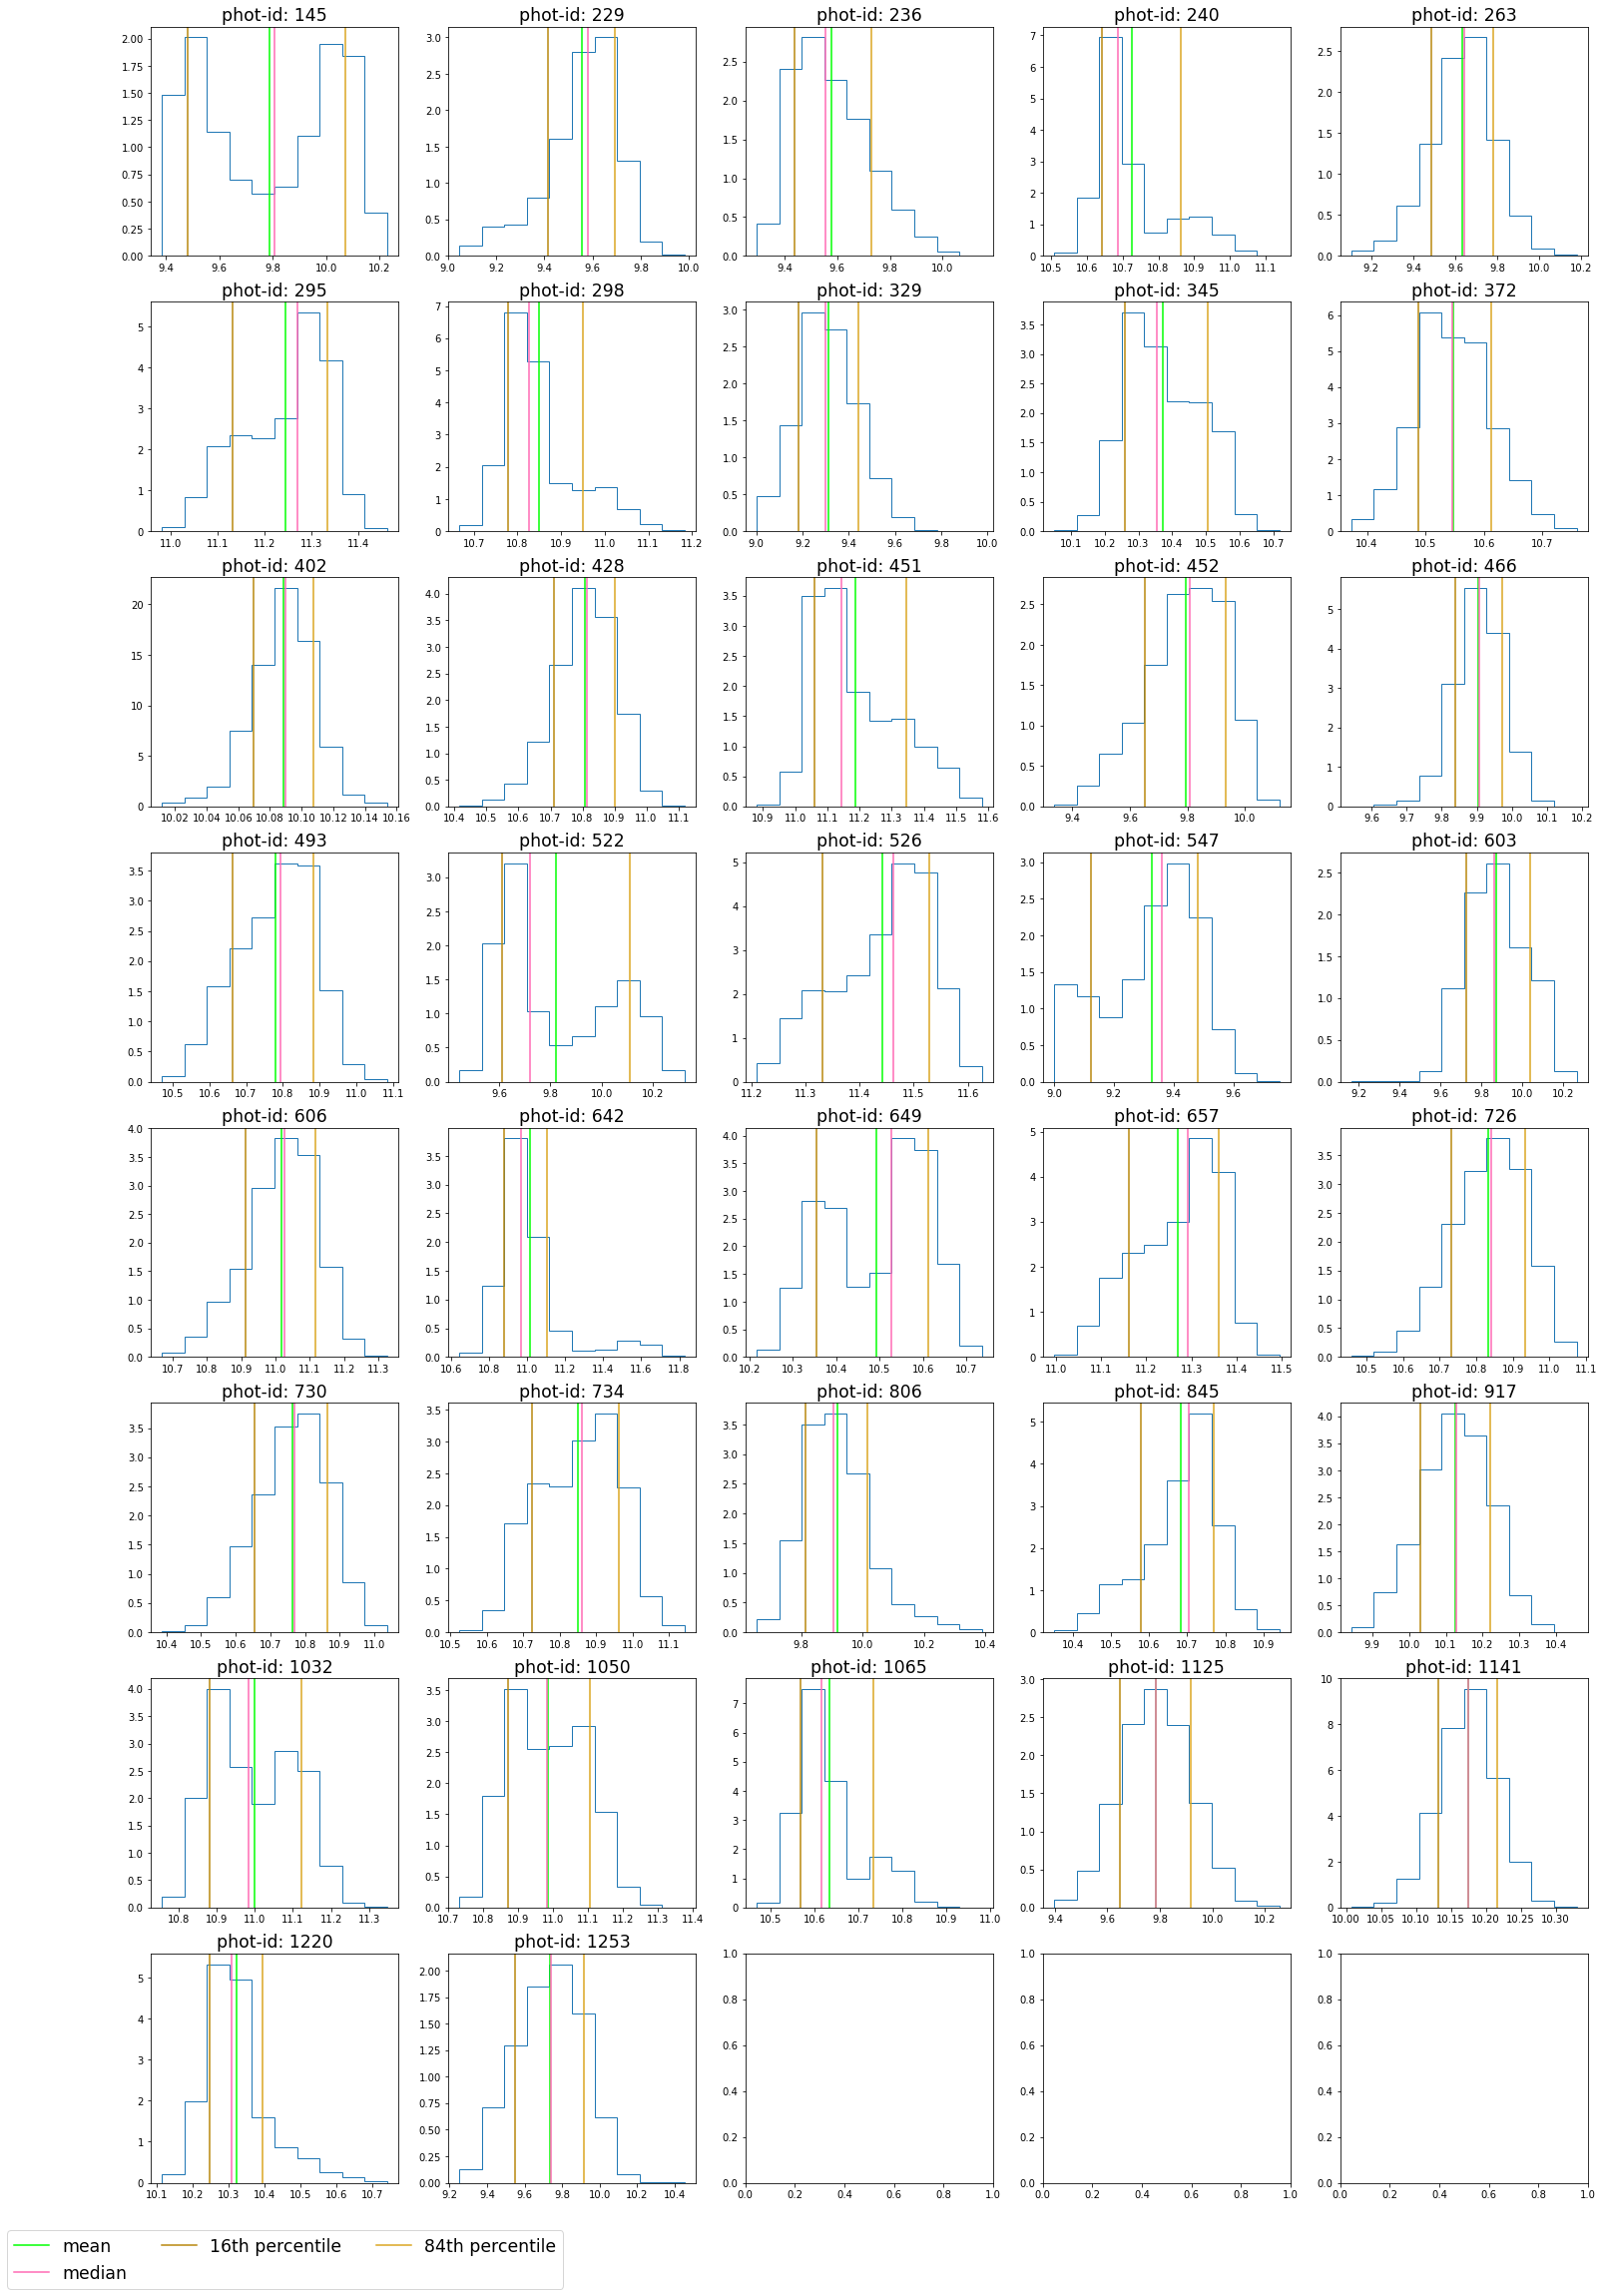

In [12]:
fig, axs = plt.subplots(8,5, figsize=(100, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(bottom = 0.2, top=0.5, right=0.3, left=0.1)

mass = []

axs = axs.ravel()

for i in range(len(A_ID)):
    axs[i].hist(Arianne_results[i]['mass'], density=1, histtype = 'step')
    axs[i].axvline(np.mean(Arianne_results[i]['mass']), color='lime', label = 'mean')
    axs[i].axvline(np.median(Arianne_results[i]['mass']), color='hotpink', label = 'median')
    axs[i].axvline(np.percentile(Arianne_results[i]['mass'],16), color='darkgoldenrod', label = '16th percentile')
    axs[i].axvline(np.percentile(Arianne_results[i]['mass'], 84), color='goldenrod', label = '84th percentile')



    axs[i].set_title('phot-id: '+ str(A_ID[i]), fontsize = 'xx-large')
        
    mass.append([A_ID[i], np.mean(Arianne_results[i]['mass']), np.std(Arianne_results[i]['mass']), 
                np.median(Arianne_results[i]['mass']), np.percentile(Arianne_results[i]['mass'],16), 
                np.percentile(Arianne_results[i]['mass'], 84)])
    
axs[i].legend(loc='lower right',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')

mass = pd.DataFrame(mass, columns=('Ariane_ID','mean_mass', 'std_mass', 'median_mass', 'mass_16th', 'mass_84th'))

In [13]:
mass

,Ariane_ID,mean_mass,std_mass,median_mass,mass_16th,mass_84th
0,145,9.787364,0.253732,9.807662,9.481752,10.072698
1,229,9.555426,0.151462,9.581114,9.416190,9.693948
2,236,9.579589,0.142497,9.556415,9.437530,9.730655
3,240,10.725762,0.107571,10.687876,10.642159,10.864223
4,263,9.634027,0.150876,9.641373,9.484867,9.778352
5,295,11.244410,0.091114,11.269269,11.131854,11.333323
6,298,10.849516,0.084324,10.826898,10.779057,10.949488
7,329,9.309779,0.129275,9.300073,9.182891,9.440896
8,345,10.372687,0.109282,10.355333,10.261334,10.503940
9,372,10.548180,0.063670,10.545492,10.487131,10.613393


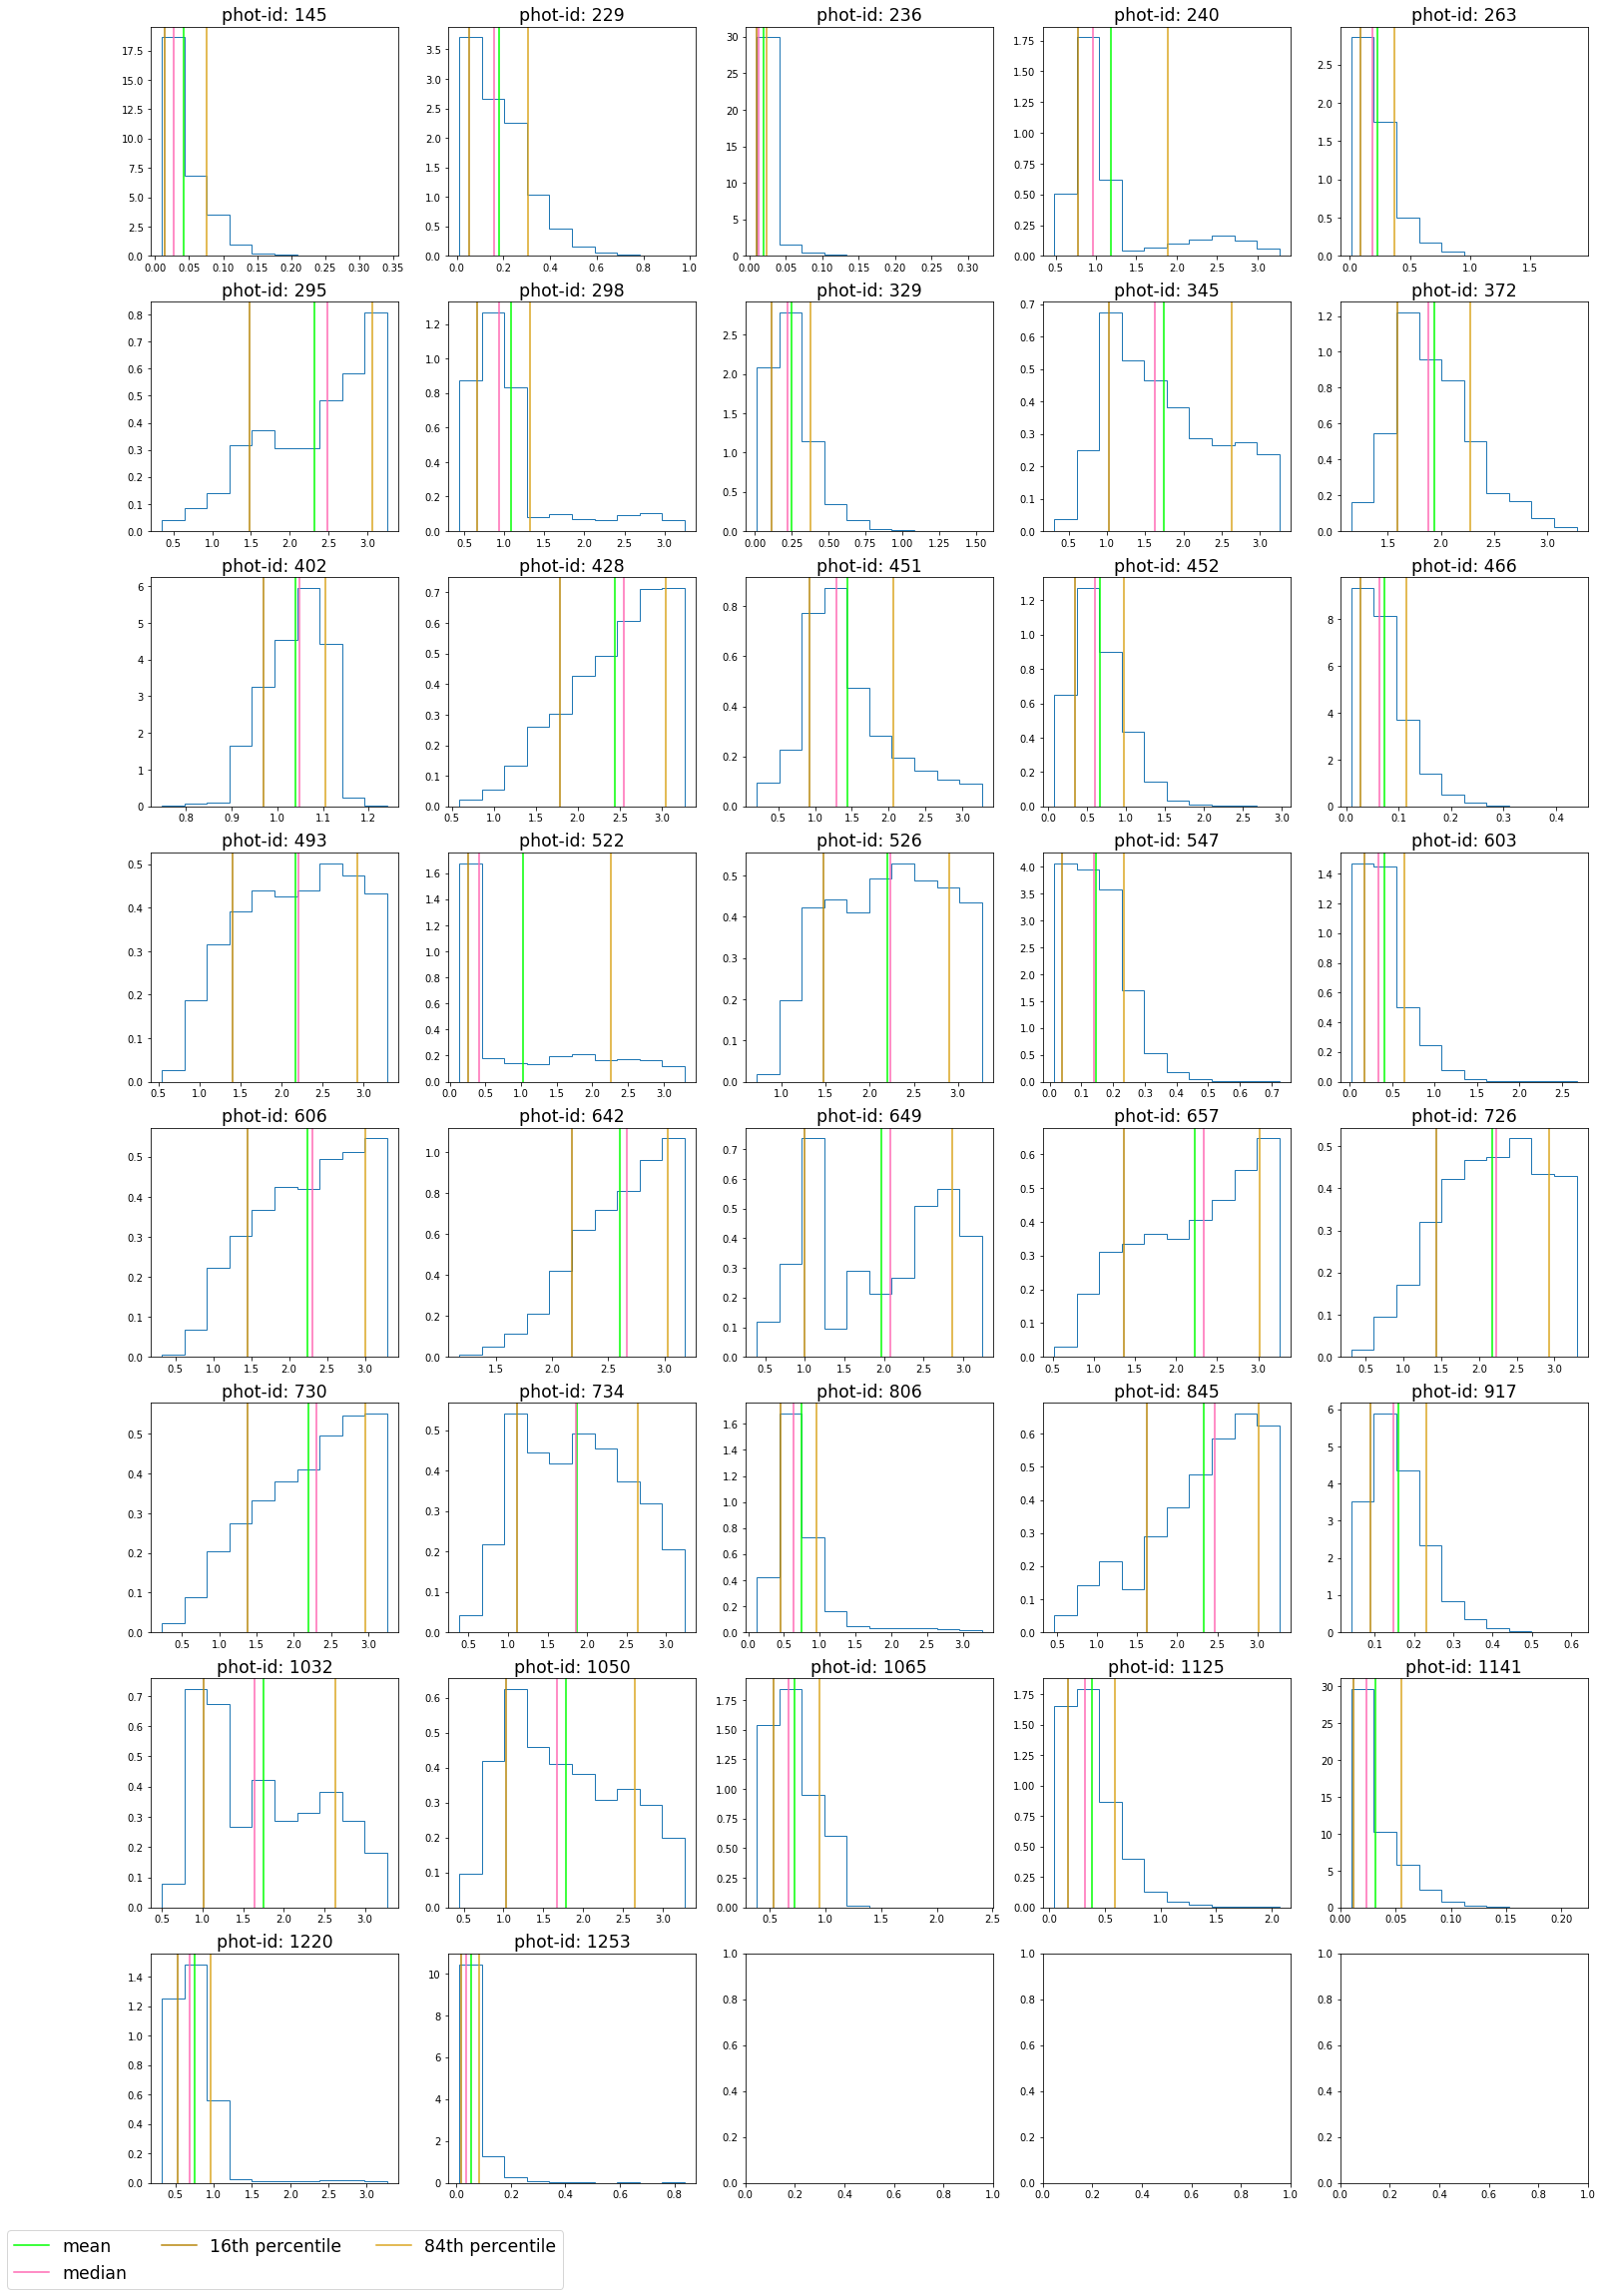

In [14]:
fig, axs = plt.subplots(8,5, figsize=(100, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(bottom = 0.2, top=0.5, right=0.3, left=0.1)

age = []

axs = axs.ravel()

for i in range(len(A_ID)):
    axs[i].hist(Arianne_results[i]['age_oldest'], density=1, histtype = 'step')
    axs[i].axvline(np.mean(Arianne_results[i]['age_oldest']), color='lime', label = 'mean')
    axs[i].axvline(np.median(Arianne_results[i]['age_oldest']), color='hotpink', label = 'median')
    axs[i].axvline(np.percentile(Arianne_results[i]['age_oldest'],16), color='darkgoldenrod', label = '16th percentile')
    axs[i].axvline(np.percentile(Arianne_results[i]['age_oldest'], 84), color='goldenrod', label = '84th percentile')
    



    axs[i].set_title('phot-id: '+ str(A_ID[i]), fontsize = 'xx-large')
    
    age.append([A_ID[i], np.mean(Arianne_results[i]['age_oldest']), np.std(Arianne_results[i]['age_oldest']), 
                np.median(Arianne_results[i]['age_oldest']), np.percentile(Arianne_results[i]['age_oldest'],16), 
                np.percentile(Arianne_results[i]['age_oldest'], 84)])
    
axs[i].legend(loc='lower right',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')

age = pd.DataFrame(age, columns=('Ariane_ID','mean_age', 'std_age', 'median_age', 'age_16th', 'age_84th'))

In [15]:
age_tab = QTable.from_pandas(age)
mass_tab = QTable.from_pandas(mass)

In [16]:
mass_tab

Ariane_ID,mean_mass,std_mass,median_mass,mass_16th,mass_84th
int64,float64,float64,float64,float64,float64
145,9.787363882264117,0.2537317168469017,9.807662433677049,9.481752066362741,10.072697968855357
229,9.555426378632108,0.1514616850032907,9.581113568824083,9.416190131239649,9.693947701785932
236,9.579588680885452,0.1424967601112766,9.556414909744461,9.43753014286937,9.730654921194795
240,10.725761833916913,0.10757135774596757,10.68787617805638,10.642158590853729,10.864223406131702
263,9.634027139099778,0.15087617259180705,9.641373434938764,9.484866613095004,9.778351729866928
295,11.244410314737184,0.09111369282301929,11.269268903054718,11.131853979216077,11.333322834033508
...,...,...,...,...,...
1032,10.998246517422992,0.10889657954529364,10.984298878882175,10.881691270577909,11.12205809059068
1050,10.986051636982845,0.10750000744925099,10.983240190553579,10.870858170548184,11.106434421071144


In [17]:
mass_age = join(mass_tab, age_tab, 'Ariane_ID')

In [18]:
mass_age

Ariane_ID,mean_mass,std_mass,median_mass,mass_16th,mass_84th,mean_age,std_age,median_age,age_16th,age_84th
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
145,9.787363882264117,0.2537317168469017,9.807662433677049,9.481752066362741,10.072697968855357,0.04206410098251993,0.033747598992569676,0.0279621976261062,0.0134574567972076,0.07602681259414339
229,9.555426378632108,0.1514616850032907,9.581113568824083,9.416190131239649,9.693947701785932,0.1820362437551686,0.13030119240601484,0.1592528088944456,0.05388029580833,0.3059227675054609
236,9.579588680885452,0.1424967601112766,9.556414909744461,9.43753014286937,9.730654921194795,0.01935266480652138,0.019789958999943617,0.01285935767274215,0.010661207966515384,0.023896559502343196
240,10.725761833916913,0.10757135774596757,10.68787617805638,10.642158590853729,10.864223406131702,1.1903480383317506,0.6288735768610423,0.9632858995518744,0.7726202208934744,1.8870665772130266
263,9.634027139099778,0.15087617259180705,9.641373434938764,9.484866613095004,9.778351729866928,0.23311930117566307,0.17050982538501105,0.18928912166041595,0.0922730200846359,0.3693452912028384
295,11.244410314737184,0.09111369282301929,11.269268903054718,11.131853979216077,11.333322834033508,2.314465178197157,0.7107126643778074,2.4889157562670956,1.4832411841015873,3.0696768277157984
...,...,...,...,...,...,...,...,...,...,...
1032,10.998246517422992,0.10889657954529364,10.984298878882175,10.881691270577909,11.12205809059068,1.7468297524952974,0.7188524529053306,1.643832428795604,1.0126439185257956,2.630042364405425
1050,10.986051636982845,0.10750000744925099,10.983240190553579,10.870858170548184,11.106434421071144,1.784303653368264,0.7126156549820581,1.6756524319737744,1.0253339937192745,2.641915607098821


In [19]:
mass_age_Ari = join(Ariane_tab, mass_age, 'Ariane_ID')


In [20]:
mass_age_Ari

Ariane_ID,ra,dec,f140w_mag,Quality,age_class,phot_id,mean_mass,std_mass,median_mass,mass_16th,mass_84th,mean_age,std_age,median_age,age_16th,age_84th
int64,float64,float64,float64,str7,str12,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
145,34.4448,-3.7729,23.32,gold,star_forming,146,9.787363882264117,0.2537317168469017,9.807662433677049,9.481752066362741,10.072697968855357,0.04206410098251993,0.033747598992569676,0.0279621976261062,0.0134574567972076,0.07602681259414339
229,34.4405,-3.7704,24.18,silver,star_forming,232,9.555426378632108,0.1514616850032907,9.581113568824083,9.416190131239649,9.693947701785932,0.1820362437551686,0.13030119240601484,0.1592528088944456,0.05388029580833,0.3059227675054609
240,34.4224,-3.77,22.73,gold,old,243,10.725761833916913,0.10757135774596757,10.68787617805638,10.642158590853729,10.864223406131702,1.1903480383317506,0.6288735768610423,0.9632858995518744,0.7726202208934744,1.8870665772130266
263,34.4211,-3.7692,24.4,silver,star_forming,266,9.634027139099778,0.15087617259180705,9.641373434938764,9.484866613095004,9.778351729866928,0.23311930117566307,0.17050982538501105,0.18928912166041595,0.0922730200846359,0.3693452912028384
295,34.4353,-3.768,22.67,gold,very_old,316,11.244410314737184,0.09111369282301929,11.269268903054718,11.131853979216077,11.333322834033508,2.314465178197157,0.7107126643778074,2.4889157562670956,1.4832411841015873,3.0696768277157984
298,34.4472,-3.768,22.9,gold,old,305,10.849516432448564,0.08432368462472847,10.82689803438624,10.779057466452269,10.949488447908587,1.08794746822438,0.5931753455144457,0.931209225170645,0.6638085537960523,1.324663139234421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,34.4477,-3.7561,24.19,gold,young,808,9.918198997458797,0.11080872717139752,9.904726563662877,9.813106437972626,10.015157659828375,0.7414374095934736,0.431810410631835,0.6300091591588448,0.448855533517438,0.9486591500801578
845,34.4347,-3.7549,23.51,gold,very_old,847,10.682660312327828,0.09660174831135143,10.703702500578531,10.578958326766422,10.769622854382693,2.333245779639668,0.6729688661343565,2.4695099939902065,1.6202859446603646,3.0126042920430747


In [21]:
mass_age_Ari['mass_16th'] = mass_age_Ari['median_mass'] - mass_age_Ari['mass_16th']
mass_age_Ari['mass_84th'] = mass_age_Ari['mass_84th'] - mass_age_Ari['median_mass']

mass_age_Ari['age_16th'] = mass_age_Ari['median_age'] - mass_age_Ari['age_16th']
mass_age_Ari['age_84th'] = mass_age_Ari['age_84th'] - mass_age_Ari['median_age']

In [22]:
nlines = len(mass_age_Ari) + 2
mass_age_Ari.pprint(nlines) 

Ariane_ID    ra     dec   ...       age_16th            age_84th      
--------- ------- ------- ... ------------------- --------------------
      145 34.4448 -3.7729 ...  0.0145047408288986 0.048064614968037184
      229 34.4405 -3.7704 ... 0.10537251308611559  0.14666995861101528
      240 34.4224   -3.77 ...     0.1906656786584   0.9237806776611522
      263 34.4211 -3.7692 ... 0.09701610157578004  0.18005616954242243
      295 34.4353  -3.768 ...  1.0056745721655083   0.5807610714487028
      298 34.4472  -3.768 ... 0.26740067137459267  0.39345391406377606
      345 34.4419 -3.7667 ...  0.5942328989302987   1.0102973408678602
      451 34.4223 -3.7635 ... 0.35829770595814103    0.772157779142987
      452  34.419 -3.7639 ... 0.25857382547938235  0.37575274719115626
      493  34.433 -3.7632 ...  0.8029979781479808   0.7147477624285665
      522  34.419 -3.7628 ... 0.15838613318543304   1.8500435313043517
      526 34.4342 -3.7588 ...   0.764943571044725   0.6698311587482952
      

In [22]:
OGMembers_data

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue,26.11162986593104,47.68071642215873,22.216629373061103,95.36143284431746,63.27039259668711,1759.2925255187774,0.189492093728411,44.32389759706494,-0.5352010107752259,-0.33273482505529095,0.539651580932543,1759.2925255187774,0.22271368581033457,32.08679361945716,-0.3270488359410343,-0.17201645130241877,0.08317516356122207
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,red,27.528370335840542,47.68071642215873,26.111629865931363,95.36143284431746,74.84541687719181,1759.6512766393612,0.22275910110267494,32.07371148222582,-0.6636616027510007,-0.4732235496896658,0.6385085063943611,1759.6512766393612,0.23484535673639592,28.857331988194048,-0.3947798155402058,-0.2180865964232536,0.06706860737029852
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red,45.26627613801323,47.68071642215873,23.369032342347584,95.36143284431746,58.51408493074527,1759.6453852384627,0.1993612515236306,40.04410845609093,-0.5800806755759949,-0.376834138942437,0.49918375021520106,1759.6453852384627,0.3861666726497421,10.672607830184136,-0.7761651117887935,-0.6500722208607143,0.16581839961969455
300.0,0.5262552524058411,-1.719699681147167,-0.16328462155609946,-0.0450455557976735,2.763935862483167,0.029687281963913355,0.0,0.8830844140342652,4.353034512217102,34.435031,-3.7679480000000005,24.085,0.0539,24.3496,0.0423,22.5026,0.0233,22.7896,0.026000000000000002,0.338485,1.9868970000000001,1.9842830000000002,1.9890740000000002,0.769476,295,1,16.9164,0,1.0,1.13463e-22,red,28.84208405837951,47.68071642215873,18.652894507236958,95.36143284431746,33.07733823902072,1758.8039445078145,0.15905177927695233,62.91338722192038,-0.3402638221194748,-0.18062969990760758,0.2820478879897514,1758.8039445078145,0.24593420531922633,26.313720636034258,-0.4481265674983558,-0.25816051261285783,0.14439201910145769
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red,17.892732589349432,47.68071642215873,13.840356634258285,95.36143284431746,57.09300538953799,1758.2662746

In [23]:

OGMembers_age_data = join(OGMembers_data, mass_age_Ari, 'phot_id')



In [50]:
compareAge_data = join(OGMembers_age_data, emils_data, keys='phot_id')

In [45]:
very_old1 = compareAge_data[compareAge_data['age_class'] == 'very_old']
old1 = compareAge_data[compareAge_data['age_class'] == 'old']
star_forming1 = compareAge_data[compareAge_data['age_class'] == 'star_forming']
young1 = compareAge_data[compareAge_data['age_class'] == 'young']
dusty1_726 = compareAge_data[compareAge_data['age_class'] == 'dusty']

In [51]:
members_ellipCA1 = compareOG_data[(compareOG_data['C'] >= 3.15) & (np.abs(compareOG_data['A']) < 0.075)]
members_mergerCA1 = compareOG_data[(compareOG_data['C'] < 3.15) & (np.abs(compareOG_data['A']) >= 0.075)]
members_otherCA1 = compareOG_data[(compareOG_data['C'] < 3.15) & (np.abs(compareOG_data['A']) < 0.075)]


In [24]:
OGMembers_age_data

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra_1,dec_1,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi,Ariane_ID,ra_2,dec_2,f140w_mag,Quality,age_class,mean_mass,std_mass,median_mass,mass_16th,mass_84th,mean_age,std_age,median_age,age_16th,age_84th
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str7,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue,26.11162986593104,47.68071642215873,22.216629373061103,95.36143284431746,63.27039259668711,1759.2925255187774,0.189492093728411,44.32389759706494,-0.5352010107752259,-0.33273482505529095,0.539651580932543,1759.2925255187774,0.22271368581033457,32.08679361945716,-0.3270488359410343,-0.17201645130241877,0.08317516356122207,145,34.4448,-3.7729,23.32,gold,star_forming,9.787363882264117,0.2537317168469017,9.807662433677049,0.32591036731430734,0.265035535178308,0.04206410098251993,0.033747598992569676,0.0279621976261062,0.0145047408288986,0.048064614968037184
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red,45.26627613801323,47.68071642215873,23.369032342347584,95.36143284431746,58.51408493074527,1759.6453852384627,0.1993612515236306,40.04410845609093,-0.5800806755759949,-0.376834138942437,0.49918375021520106,1759.6453852384627,0.3861666726497421,10.672607830184136,-0.7761651117887935,-0.6500722208607143,0.16581839961969455,240,34.4224,-3.77,22.73,gold,old,10.725761833916913,0.10757135774596757,10.68787617805638,0.045717587202650734,0.176347228075322,1.1903480383317506,0.6288735768610423,0.9632858995518744,0.1906656786584,0.9237806776611522
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red,17.892732589349432,47.68071642215873,13.840356634258285,95.36143284431746,57.09300538953799,1758.2662746929113,0.11797956589155745,114.34219999072057,0.19904028893305536,0.07883377606577263,0.48667878793161023,1758.2662746929113,0.15252329685493668,68.41443793433788,0.43484500796098646,0.15680499108904614,0.3008918674207727,298,34.4472,-3.768,22.9,gold,old,10.849516432448564,0.08432368462472847,10.82689803438624,0.047840567933970846,0.12259041352234767,1.08794746822438,0.5931753455144457,0.931209225170645,0.26740067137459267,0.39345391406377606
347.0,0.5107059092774276,-1.7696610385160123,-0.2056306493851361,-0.0673840341690724,2.7876584183345243,-0.03376216054452196,0.03419352126397179,1.065721957149683,7.267380119207635,34.441846000000005,-3.766667,24.8274,0.0937,

In [25]:
very_old = OGMembers_age_data[OGMembers_age_data['age_class'] == 'very_old']
old = OGMembers_age_data[OGMembers_age_data['age_class'] == 'old']
star_forming = OGMembers_age_data[OGMembers_age_data['age_class'] == 'star_forming']
young = OGMembers_age_data[OGMembers_age_data['age_class'] == 'young']
dusty_726 = OGMembers_age_data[OGMembers_age_data['age_class'] == 'dusty']

In [26]:
membersA_merger = OGMembers_age_data[(OGMembers_age_data['Gini'] >= (-0.14*OGMembers_age_data['M20']) + 0.33)]
membersA_ellip = OGMembers_age_data[(OGMembers_age_data['Gini'] < (-0.14*OGMembers_age_data['M20']) + 0.33) & (OGMembers_age_data['Gini'] >= (0.14*OGMembers_age_data['M20']) + 0.80)]
membersA_spiral = OGMembers_age_data[(OGMembers_age_data['Gini'] < (-0.14*OGMembers_age_data['M20']) + 0.33) & (OGMembers_age_data['Gini'] < (0.14*OGMembers_age_data['M20']) + 0.80)]



In [27]:
membersA_merger

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra_1,dec_1,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi,Ariane_ID,ra_2,dec_2,f140w_mag,Quality,age_class,mean_mass,std_mass,median_mass,mass_16th,mass_84th,mean_age,std_age,median_age,age_16th,age_84th
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str7,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
661.0,0.6290575620274537,-1.8504777920888404,0.436216041953462,0.03855057330683026,4.615556958410371,0.032898619514662816,-0.15621660102654913,1.46314122729599,70.80882210775658,34.434096000000004,-3.757658,23.1297,0.0479,24.2302,0.0389,21.6681,0.017,22.7377,0.0248,0.443221,1.9827009999999998,1.979659,1.9876770000000001,0.711522,657,1,18.5187,0,0.9999100000000001,6.81998e-11,red,12.54477148160969,47.68071642215873,6.089764653804369,95.36143284431746,4.119042159163395,1759.1782355765024,0.05193799966981293,589.996850183824,5.186954543216908,0.7914769251839601,0.03513022628369154,1759.1782355765024,0.1069910536957597,139.03533969911598,1.9159658271095497,0.4647824300764185,1.495700725356743,657,34.4341,-3.7577,22.53,silver,very_old,11.270181202164883,0.09137314776463683,11.291385143146169,0.13069065721775353,0.068593967296259,2.2285852268959085,0.7016817144800732,2.3309425434411764,0.9592133032894032,0.6791810490285894


In [28]:
membersA_ellipCA = OGMembers_age_data[(OGMembers_age_data['C'] >= 3.15) & (np.abs(OGMembers_age_data['A']) < 0.075)]
membersA_mergerCA = OGMembers_age_data[(OGMembers_age_data['C'] < 3.15) & (np.abs(OGMembers_age_data['A']) >= 0.075)]
membersA_otherCA = OGMembers_age_data[(OGMembers_age_data['C'] < 3.15) & (np.abs(OGMembers_age_data['A']) < 0.075)]



In [41]:
members_ellipCA = OGMembers_age_data[(OGMembers_age_data['C'] >= 3.15) & (np.abs(OGMembers_age_data['A']) < 0.075)]
members_mergerCA = OGMembers_age_data[(OGMembers_age_data['C'] < 3.15) & (np.abs(OGMembers_age_data['A']) >= 0.075)]
members_otherCA = OGMembers_age_data[(OGMembers_age_data['C'] < 3.15) & (np.abs(OGMembers_age_data['A']) < 0.075)]



In [30]:
x = stats.spearmanr(OGMembers_age_data['median_age'], OGMembers_age_data['Gini'])[0]

In [31]:
x

0.443859649122807

In [29]:
def PartialSpearman(X, Y, Z):
    
    pXY = stats.spearmanr(X, Y)[0]
    pXZ = stats.spearmanr(X, Z)[0]
    pYZ = stats.spearmanr(Y, Z)[0]
    
    pXYZ = (pXY - (pXZ*pYZ)) / m.sqrt((1-(pXY**2))*(1-(pYZ**2)))
    
    return pXYZ

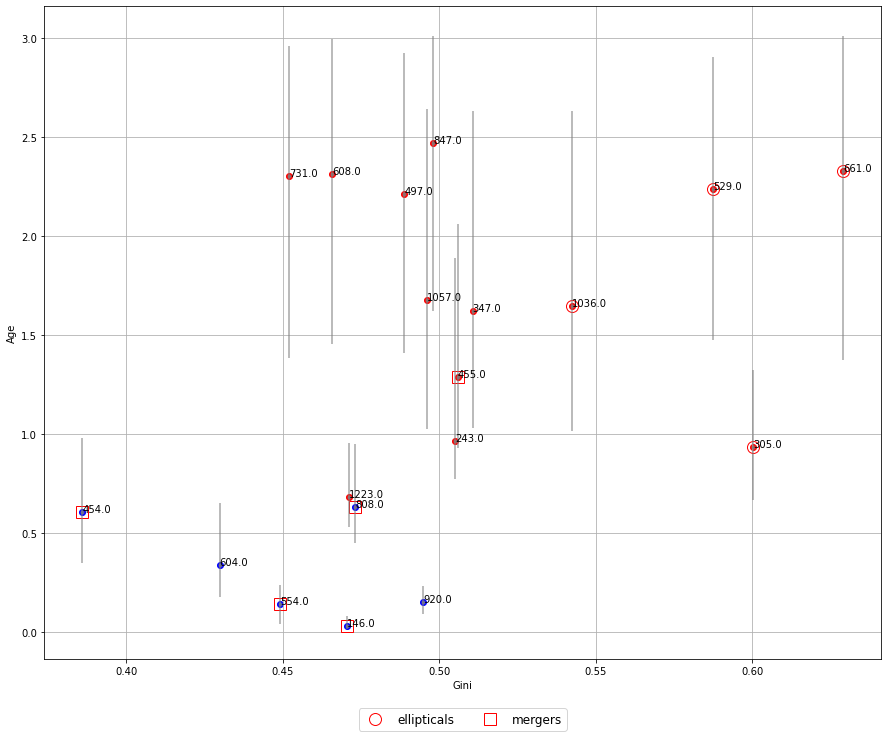

In [30]:
plt.rcParams["figure.figsize"] = (15,12)


plt.plot((membersA_ellipCA['Gini']), (membersA_ellipCA['median_age']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['Gini']), (membersA_mergerCA['median_age']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['Gini'][i]), (OGMembers_age_data['median_age'][i]), color = (OGMembers_age_data['colour'][i]))
    
    plt.text(np.abs(OGMembers_age_data['Gini'][i]), (OGMembers_age_data['median_age'][i]), str(OGMembers_age_data['phot_id'][i]), color='black')


plt.errorbar(OGMembers_age_data['Gini'], (OGMembers_age_data['median_age']), color = 'grey', 
             yerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)





plt.xlabel('Gini')
plt.ylabel('Age')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.12), ncol = 3, fontsize = 'large')



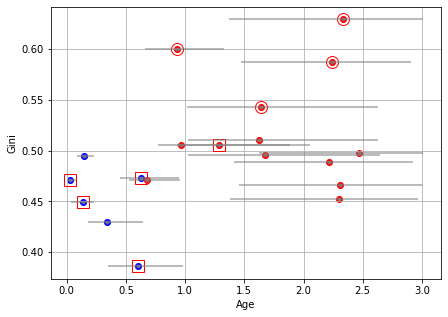

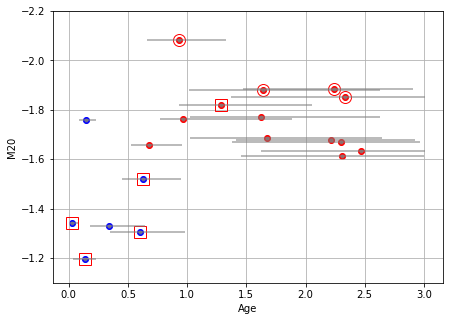

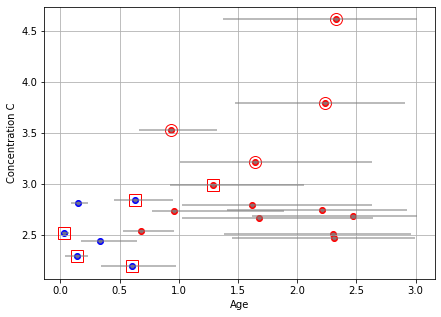

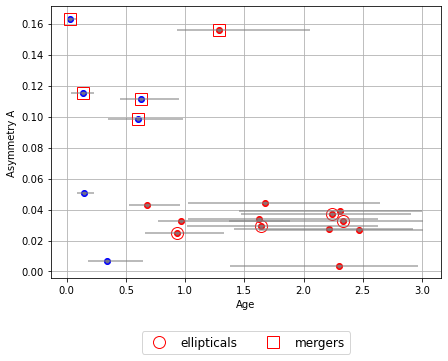

In [31]:
plt.rcParams["figure.figsize"] = (7,5)


plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['Gini'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['Gini']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)


plt.xlabel('Age')
plt.ylabel('Gini')
plt.grid(True)
plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['M20'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['M20']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('M20')
plt.xlabel('Age')
plt.ylim(-1.1, -2.2)
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['C']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['C']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['C'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['C']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('Concentration C')
plt.xlabel('Age')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), np.abs(membersA_ellipCA['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), np.abs(membersA_mergerCA['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), np.abs(OGMembers_age_data['A'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], np.abs(OGMembers_age_data['A']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('Asymmetry A')
plt.xlabel('Age')
plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')




In [32]:
print(p_M_A_Gini)

NameError: name 'p_M_A_Gini' is not defined

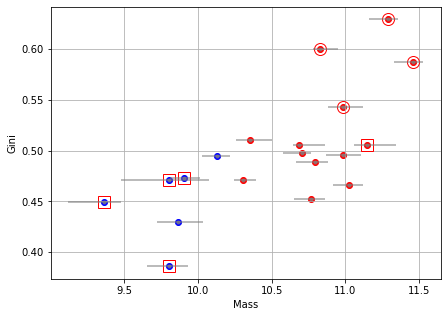

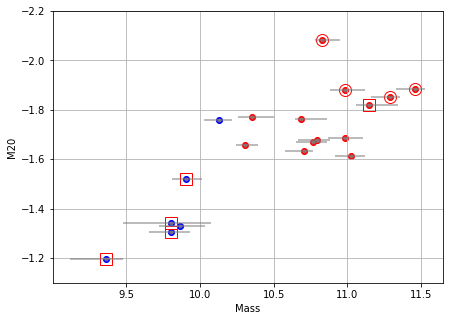

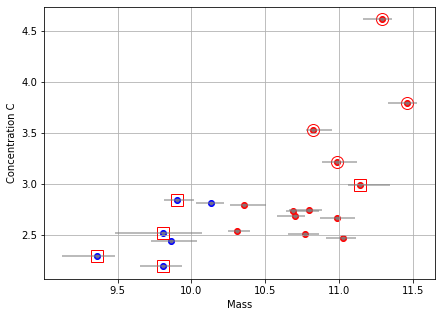

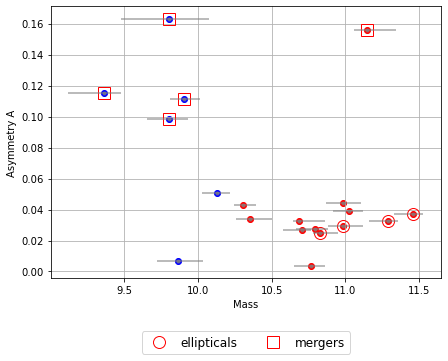

In [33]:
plt.rcParams["figure.figsize"] = (7,5)


plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['Gini'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['Gini']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)


plt.xlabel('Mass')
plt.ylabel('Gini')
plt.grid(True)
plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['M20'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['M20']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('M20')
plt.xlabel('Mass')
plt.ylim(-1.1, -2.2)
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['C']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['C']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['C'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['C']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('Concentration C')
plt.xlabel('Mass')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), np.abs(membersA_ellipCA['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), np.abs(membersA_mergerCA['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), np.abs(OGMembers_age_data['A'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], np.abs(OGMembers_age_data['A']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('Asymmetry A')
plt.xlabel('Mass')
plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')





In [34]:
stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age'])

SpearmanrResult(correlation=0.7859649122807018, pvalue=6.633365568960715e-05)

In [35]:

print(stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age']))

print(stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['Gini']))
print(stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['M20']))
print(stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['C']))
print(stats.spearmanr(OGMembers_age_data['median_mass'], OGMembers_age_data['A']))

print(stats.spearmanr(OGMembers_age_data['median_age'], OGMembers_age_data['Gini']))
print(stats.spearmanr(OGMembers_age_data['median_age'], OGMembers_age_data['M20']))
print(stats.spearmanr(OGMembers_age_data['median_age'], OGMembers_age_data['C']))
print(stats.spearmanr(OGMembers_age_data['median_age'], OGMembers_age_data['A']))






SpearmanrResult(correlation=0.7859649122807018, pvalue=6.633365568960715e-05)
SpearmanrResult(correlation=0.7017543859649124, pvalue=0.0008117889387414537)
SpearmanrResult(correlation=-0.7666666666666666, pvalue=0.00012866505735862106)
SpearmanrResult(correlation=0.6491228070175438, pvalue=0.002636625075935029)
SpearmanrResult(correlation=-0.08771929824561404, pvalue=0.7210236536238765)
SpearmanrResult(correlation=0.443859649122807, pvalue=0.0569517005585568)
SpearmanrResult(correlation=-0.4333333333333333, pvalue=0.06382621222101997)
SpearmanrResult(correlation=0.3298245614035088, pvalue=0.1678874652519488)
SpearmanrResult(correlation=-0.34912280701754383, pvalue=0.1429092824511441)


In [36]:
p_M_A_Gini = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age'], OGMembers_age_data['Gini'])
p_M_A_M20 = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age'], OGMembers_age_data['M20'])
p_M_A_C = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age'], OGMembers_age_data['C'])
p_M_A_A = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['median_age'], OGMembers_age_data['A'])

print('mass-age-Gini: ' + str(p_M_A_Gini))
print('mass-age-M20: ' + str(p_M_A_M20))
print('mass-age-C: ' + str(p_M_A_C))
print('mass-age-A: ' + str(p_M_A_A))

mass-age-Gini: 0.856423052162492
mass-age-M20: 0.8143165456091601
mass-age-C: 0.9797733469544412
mass-age-A: 1.3037320030467046


In [37]:
p_M_Gini_A = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['Gini'], OGMembers_age_data['median_age'])
p_M_M20_A = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['M20'], OGMembers_age_data['median_age'])
p_M_C_A = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['C'], OGMembers_age_data['median_age'])
p_M_A_age = PartialSpearman(OGMembers_age_data['median_mass'], OGMembers_age_data['A'], OGMembers_age_data['median_age'])

print('mass-Gini-age: ' + str(p_M_Gini_A))
print('mass-M20-age: ' + str(p_M_M20_A))
print('mass-C-age: ' + str(p_M_C_A))
print('mass-A-age: ' + str(p_M_A_age))

mass-Gini-age: 0.5527858402548671
mass-M20-age: -0.736359548336971
mass-C-age: 0.5429366168921983
mass-A-age: 0.19998502885858277


In [38]:
p_A_Gini_M = PartialSpearman(OGMembers_age_data['median_age'], OGMembers_age_data['Gini'], OGMembers_age_data['median_mass'])
p_A_M20_M = PartialSpearman(OGMembers_age_data['median_age'], OGMembers_age_data['M20'], OGMembers_age_data['median_mass'])
p_A_C_M = PartialSpearman(OGMembers_age_data['median_age'], OGMembers_age_data['C'], OGMembers_age_data['median_mass'])
p_age_A_M = PartialSpearman(OGMembers_age_data['median_age'], OGMembers_age_data['A'], OGMembers_age_data['median_mass'])

print('age-Gini-mass: ' + str(p_A_Gini_M))
print('age-M20-mass: ' + str(p_A_M20_M))
print('age-C-mass: ' + str(p_A_C_M))
print('age-A-mass: ' + str(p_age_A_M))

age-Gini-mass: -0.1686957206820211
age-M20-mass: 0.2924820934514404
age-C-mass: -0.2511611177325051
age-A-mass: -0.30014900047808457


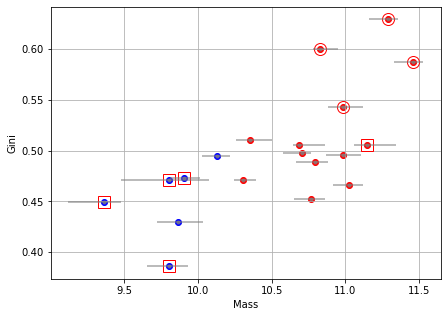

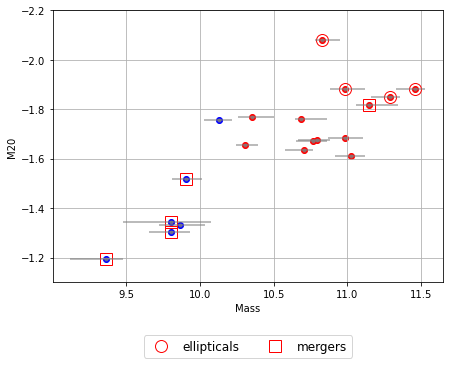

In [39]:
plt.rcParams["figure.figsize"] = (7,5)


plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['Gini'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['Gini']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)


plt.xlabel('Mass')
plt.ylabel('Gini')
plt.grid(True)
plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['M20'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['M20']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('M20')
plt.xlabel('Mass')
plt.ylim(-1.1, -2.2)
plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')




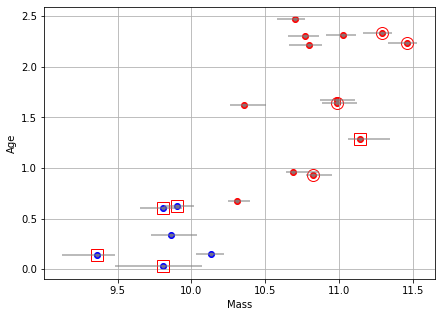

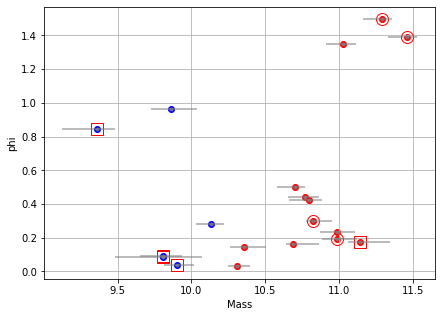

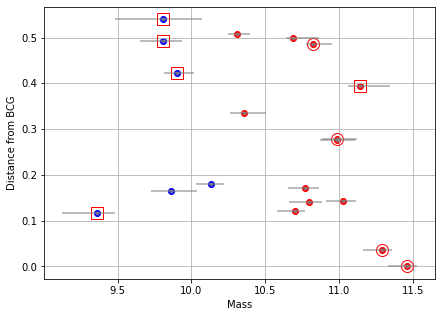

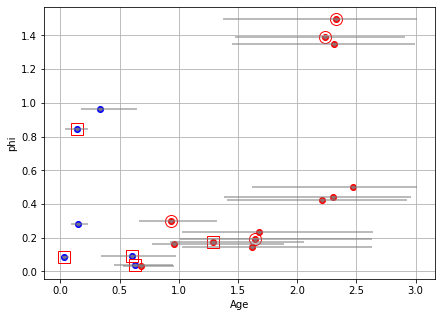

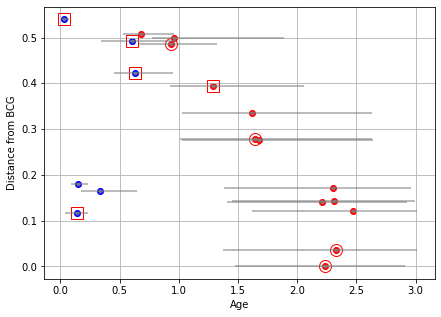

In [71]:
plt.rcParams["figure.figsize"] = (7,5)


plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['median_age']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['median_age']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['median_age'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['median_age']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)


plt.xlabel('Mass')
plt.ylabel('Age')
plt.grid(True)
plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['phi'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['phi']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('phi')
plt.xlabel('Mass')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['BCGsep_mpc']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['BCGsep_mpc']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['BCGsep_mpc'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['BCGsep_mpc']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('Distance from BCG')
plt.xlabel('Mass')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['phi'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['phi']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('phi')
plt.xlabel('Age')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['BCGsep_mpc']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['BCGsep_mpc']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['BCGsep_mpc'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['BCGsep_mpc']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('Distance from BCG')
plt.xlabel('Age')
plt.grid(True)




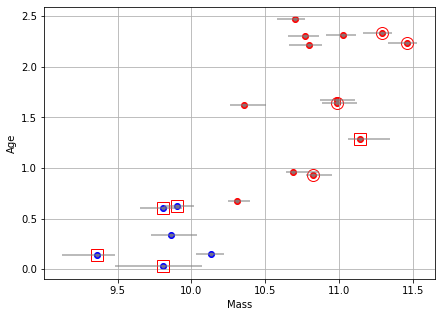

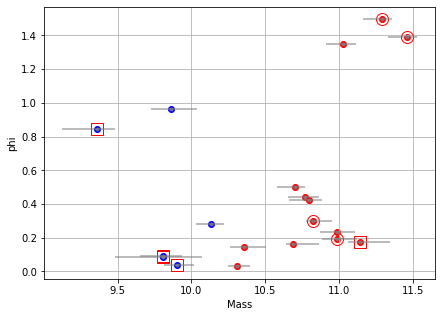

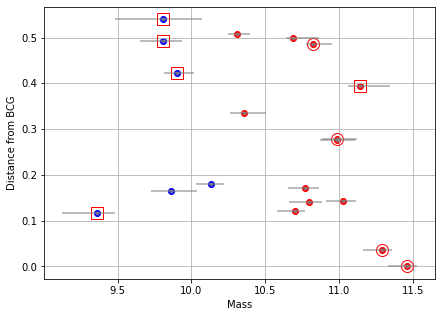

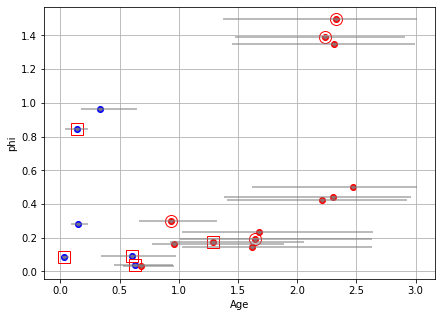

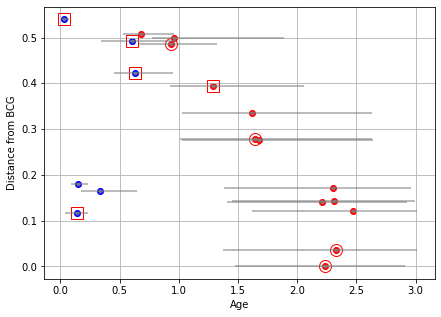

In [40]:
plt.rcParams["figure.figsize"] = (7,5)


plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['median_age']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['median_age']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['median_age'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['median_age']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)


plt.xlabel('Mass')
plt.ylabel('Age')
plt.grid(True)
plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['phi'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['phi']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('phi')
plt.xlabel('Mass')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_mass']), (membersA_ellipCA['BCGsep_mpc']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_mass']), (membersA_mergerCA['BCGsep_mpc']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_mass'][i]), (OGMembers_age_data['BCGsep_mpc'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_mass'], (OGMembers_age_data['BCGsep_mpc']), color = 'grey', 
             xerr = [OGMembers_age_data['mass_16th'],OGMembers_age_data['mass_84th']], fmt='.', alpha=0.7)



plt.ylabel('Distance from BCG')
plt.xlabel('Mass')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['phi'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['phi']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('phi')
plt.xlabel('Age')
plt.grid(True)

plt.show()

###

plt.plot((membersA_ellipCA['median_age']), (membersA_ellipCA['BCGsep_mpc']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((membersA_mergerCA['median_age']), (membersA_mergerCA['BCGsep_mpc']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_age_data)):
    
    plt.scatter((OGMembers_age_data['median_age'][i]), (OGMembers_age_data['BCGsep_mpc'][i]), color = (OGMembers_age_data['colour'][i]))
    

plt.errorbar(OGMembers_age_data['median_age'], (OGMembers_age_data['BCGsep_mpc']), color = 'grey', 
             xerr = [OGMembers_age_data['age_16th'],OGMembers_age_data['age_84th']], fmt='.', alpha=0.7)



plt.ylabel('Distance from BCG')
plt.xlabel('Age')
plt.grid(True)



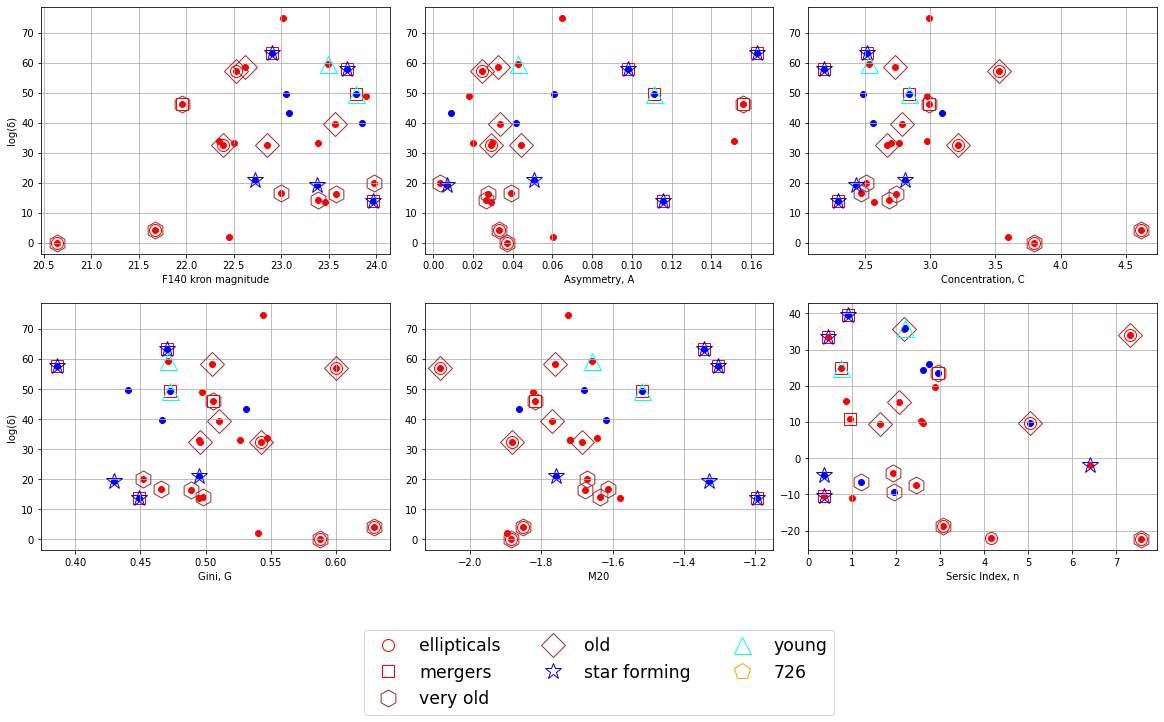

In [52]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log(\u03B4)')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log(\u03B4)')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['sep_BCG']- members_ellipCA1['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['sep_BCG']- members_mergerCA1['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['sep_BCG']-very_old1['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['sep_BCG']-old1['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['sep_BCG']-star_forming1['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['sep_BCG']-young1['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['sep_BCG']-dusty1_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['sep_BCG'][i]-compareOG_data['0p8(f140)'][i]), color = (OGMembers_data['colour'][i]))

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['0p8(f105)']- members_ellipCA['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['0p8(f105)']- members_mergerCA['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['0p8(f105)']-very_old['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['0p8(f105)']-old['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['0p8(f105)']-star_forming['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['0p8(f105)']-young['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['0p8(f105)']-dusty_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('F105W-F140W')
axs[0,0].grid(True)
axs[0,0].set_ylim(0, 2.0)
axs[0,0].axhline(1.15, ls='-.', color='grey')


axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['0p8(f105)']- members_ellipCA['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['0p8(f105)']- members_mergerCA['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['0p8(f105)']-very_old['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['0p8(f105)']-old['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['0p8(f105)']-star_forming['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['0p8(f105)']-young['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['0p8(f105)']-dusty_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)
axs[0,1].set_ylim(0, 2.0)
axs[0,1].axhline(1.15, ls='-.', color='grey')

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['0p8(f105)']- members_ellipCA['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['0p8(f105)']- members_mergerCA['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['0p8(f105)']-very_old['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['0p8(f105)']-old['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['0p8(f105)']-star_forming['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['0p8(f105)']-young['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['0p8(f105)']-dusty_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)
axs[0,2].set_ylim(0, 2.0)
axs[0,2].axhline(1.15, ls='-.', color='grey')

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['0p8(f105)']- members_ellipCA['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['0p8(f105)']- members_mergerCA['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['0p8(f105)']-very_old['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['0p8(f105)']-old['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['0p8(f105)']-star_forming['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['0p8(f105)']-young['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['0p8(f105)']-dusty_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('F105W-F140W')
axs[1,0].grid(True)
axs[1,0].set_ylim(0, 2.0)
axs[1,0].axhline(1.15, ls='-.', color='grey')

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['0p8(f105)']- members_ellipCA['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['0p8(f105)']- members_mergerCA['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['0p8(f105)']-very_old['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['0p8(f105)']-old['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['0p8(f105)']-star_forming['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['0p8(f105)']-young['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['0p8(f105)']-dusty_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_ylim(0, 2.0)
axs[1,1].set_xlim(-1.1, -2.3)

axs[1,1].axhline(1.15, ls='-.', color='grey')

###

axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['0p8(f105)']- members_ellipCA1['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['0p8(f105)']- members_mergerCA1['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['0p8(f105)']-very_old1['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['0p8(f105)']-old1['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['0p8(f105)']-star_forming1['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['0p8(f105)']-young1['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['0p8(f105)']-dusty1_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['0p8(f105)'][i]-compareOG_data['0p8(f140)'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)
axs[1,2].set_ylim(0, 2.0)
axs[1,2].axhline(1.15, ls='-.', color='grey')





axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')
